<a href="https://colab.research.google.com/github/aaolcay/Analog-and-Digital-Communication/blob/main/amplitude_modulation_decoding_message_signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

pi, sin, cos = np.pi, np.sin, np.cos
"""
Encoded letters are given below:
    A: 01001, B: 10110, C: 01111, D: 11001, E: 10011
    F: 00101, G: 10111, H: 01101, I: 01011, J: 11101
    K: 11011, L: 11111, M: 00010, N: 10001, O: 11010
    P: 00001, Q: 11110, R: 00111, S: 00110, T: 01010
    U: 00011, V: 10101, W: 11100, X: 00100, Y: 10010
    Z: 01100
"""

In [2]:
def letter_bank_encoding(letter):
  if letter == 'A' or letter == 'a':
    encoded_letter = [0, 1, 0, 0, 1]
  elif letter == 'B' or letter == 'b':
    encoded_letter = [1, 0, 1, 1, 0]
  elif letter == 'C' or letter == 'c':
    encoded_letter = [0, 1, 1, 1, 1]
  elif letter == 'D' or letter == 'd':
    encoded_letter = [1, 1, 0, 0, 1]
  elif letter == 'E' or letter == 'e':
    encoded_letter = [1, 0, 0, 1, 1]
  elif letter == 'F' or letter == 'f':
    encoded_letter = [0, 0, 1, 0, 1]
  elif letter == 'G' or letter == 'g':
    encoded_letter = [1, 0, 1, 1, 1]
  elif letter == 'H' or letter == 'h':
    encoded_letter = [0, 1, 1, 0, 1]
  elif letter == 'I' or letter == 'i':
    encoded_letter = [0, 1, 0, 1, 1]
  elif letter == 'J' or letter == 'j':
    encoded_letter = [1, 1, 1, 0, 1]
  elif letter == 'K' or letter == 'k':
    encoded_letter = [1, 1, 0, 1, 1]
  elif letter == 'L' or letter == 'l':
    encoded_letter = [1, 1, 1, 1, 1]
  elif letter == 'M' or letter == 'm':
    encoded_letter = [0, 0, 0, 1, 0]
  elif letter == 'N' or letter == 'n':
    encoded_letter = [1, 0, 0, 0, 1]
  elif letter == 'O' or letter == 'o':
    encoded_letter = [1, 1, 0, 1, 0]
  elif letter == 'P' or letter == 'p':
    encoded_letter = [0, 0, 0, 0, 1]
  elif letter == 'Q' or letter == 'q':
    encoded_letter = [1, 1, 1, 1, 0]
  elif letter == 'R' or letter == 'r':
    encoded_letter = [0, 0, 1, 1, 1]
  elif letter == 'S' or letter == 's':
    encoded_letter = [0, 0, 1, 1, 0]
  elif letter == 'T' or letter == 't':
    encoded_letter = [0, 1, 0, 1, 0]
  elif letter == 'U' or letter == 'u':
    encoded_letter = [0, 0, 0, 1, 1]
  elif letter == 'V' or letter == 'v':
    encoded_letter = [1, 0, 1, 0, 1]
  elif letter == 'W' or letter == 'w':
    encoded_letter = [1, 1, 1, 0, 0]
  elif letter == 'X' or letter == 'x':
    encoded_letter = [0, 0, 1, 0, 0]
  elif letter == 'Y' or letter == 'y':
    encoded_letter = [1, 0, 0, 1, 0]
  elif letter == 'Z' or letter == 'z':
    encoded_letter = [0, 1, 1, 0, 0]
  else:
    encoded_letter = [-1, -1, -1, -1, -1]
  
  return encoded_letter

In [3]:
def letter_bank_decoding(binary_code):
  if binary_code == [0, 1, 0, 0, 1]:
    decoded_letter = 'a'
  elif binary_code == [1, 0, 1, 1, 0]:
    decoded_letter = 'b'
  elif binary_code == [0, 1, 1, 1, 1]:
    decoded_letter = 'c'
  elif binary_code == [1, 1, 0, 0, 1]:
    decoded_letter = 'd'
  elif binary_code == [1, 0, 0, 1, 1]:
    decoded_letter = 'e'
  elif binary_code == [0, 0, 1, 0, 1]:
    decoded_letter = 'f'
  elif binary_code == [1, 0, 1, 1, 1]:
    decoded_letter = 'g' 
  elif binary_code == [0, 1, 1, 0, 1]:
    decoded_letter = 'h'
  elif binary_code == [0, 1, 0, 1, 1]:
    decoded_letter = 'i'
  elif binary_code == [1, 1, 1, 0, 1]:
    decoded_letter = 'j'
  elif binary_code == [1, 1, 0, 1, 1]:
    decoded_letter = 'k'
  elif binary_code == [1, 1, 1, 1, 1]:
    decoded_letter = 'l'
  elif binary_code == [0, 0, 0, 1, 0]:
    decoded_letter = 'm'
  elif binary_code == [1, 0, 0, 0, 1]:
    decoded_letter = 'n'
  elif binary_code == [1, 1, 0, 1, 0]:
    decoded_letter = 'o'
  elif binary_code == [0, 0, 0, 0, 1]:
    decoded_letter = 'p'
  elif binary_code == [1, 1, 1, 1, 0]:
    decoded_letter = 'q'
  elif binary_code == [0, 0, 1, 1, 1]:
    decoded_letter = 'r'
  elif binary_code == [0, 0, 1, 1, 0]:
    decoded_letter = 's'
  elif binary_code == [0, 1, 0, 1, 0]:
    decoded_letter = 't'
  elif binary_code == [0, 0, 0, 1, 1]:
    decoded_letter = 'u'
  elif binary_code == [1, 0, 1, 0, 1]:
    decoded_letter = 'v'
  elif binary_code == [1, 1, 1, 0, 0]:
    decoded_letter = 'w'
  elif binary_code == [0, 0, 1, 0, 0]:
    decoded_letter = 'x' 
  elif binary_code == [1, 0, 0, 1, 0]:
    decoded_letter = 'y'
  elif binary_code == [0, 1, 1, 0, 0]:
    decoded_letter = 'z'
  else:
    decoded_letter = ' '
  
  return decoded_letter

In [4]:
def encoding(sentence):
  letters = list(sentence)  # Split the sentence into individual letters
  N = 2048
  fs = 192000
  T = N/fs # duration
  t = np.arange(0, (T), 1/fs)
  f = 1/T
  fc = 100*f
  message_signal = []
  for i in letters:
    encoded_letter = letter_bank_encoding(i)
    for k in range(len(encoded_letter)):
      if encoded_letter[k]==1:
        m_t = sin(pi*f*t)
      elif encoded_letter[k]==0:
        m_t = -sin(pi*f*t)
      else:
        m_t = np.zeros(len(t))
      message_signal.append(m_t)
  return np.hstack(np.array(message_signal)).reshape(1, -1)[0], fc

In [5]:
def create_amplitude_modulated_signal(message_signal, fc):
  # fc: Carrier frequency (Hz)
  # amplitude modulated signal = Ac*[1 + ka*m(t)]*cos(2*pi*fc*t)
  # Define the carrier signal parameters
  # Note: modulation index (Am/Ac) must be between 0 and 1
  Ac = 2  # Carrier amplitude
  ka = 0.5 # amplitude sensitivity
  fs = 192000
  t = np.arange(0, (len(message_signal)/fs), 1/fs)
  am_signal = Ac*[1 + ka*message_signal]*cos(2*pi*fc*t)
  return am_signal[0]

In [6]:
class EnvelopeDetection:
    def __init__(self, signal, sampling_rate, plot_envelope=True):
        # Constructor method that takes in a signal, its sampling rate, and a boolean flag to plot the envelope
        self.signal = signal  # Save the input signal to class attribute
        self.sampling_rate = sampling_rate  # Save the sampling rate to class attribute
        analytic_signal = self.perform_hilbert_transform()  # Perform Hilbert transform on signal
        amplitude_envelope = self.detect_envelope(analytic_signal)  # Compute amplitude envelope using analytic signal
        if plot_envelope:  # If plot_envelope flag is True, plot signal and its envelope
            plt.figure(figsize=(10,5))
            self.plot_envelope(amplitude_envelope)
        
    def perform_hilbert_transform(self):
        # Method that performs Hilbert transform on input signal
        analytic_signal = hilbert(self.signal)  # Apply Hilbert transform to signal
        return analytic_signal
    
    def detect_envelope(self, analytic_signal):
        # Method that computes the amplitude envelope of an analytic signal
        amplitude_envelope = np.abs(analytic_signal)  # Compute the absolute value of the analytic signal
        return amplitude_envelope
    
    def plot_envelope(self, amplitude_envelope):
        # Method that plots the original signal and its amplitude envelope
        time = np.arange(0, len(self.signal)) / self.sampling_rate  # Create time axis based on sampling rate and signal length
        plt.plot(time, self.signal, label='Signal')  # Plot the original signal
        plt.plot(time, amplitude_envelope, label='Envelope')  # Plot the amplitude envelope
        plt.xlabel('Time (s)')  # Set x-axis label
        plt.ylabel('Amplitude')  # Set y-axis label
        plt.legend()  # Add legend to plot
        plt.show()  # Show the plot

In [7]:
def demodulation(x, fs, plot_envelope=False):
  # find amplitude envelope
  # Function that performs envelope detection on input signal x with sampling rate fs
  ed = EnvelopeDetection(x, fs, plot_envelope)  # Create instance of EnvelopeDetection class
  analytic_signal = ed.perform_hilbert_transform()  # Perform Hilbert transform on signal
  # extract the message signal
  message_signal_decoded = ed.detect_envelope(analytic_signal) # the computed envelope
  # take 5*2048 that accounts for a letter
  num_binary_code = len(message_signal_decoded)//2048
  # decoding
  letters = []
  for i in range(0, len(message_signal_decoded), 2048*5):
    decode = []
    part_of_message_signal_decoded = message_signal_decoded[i:i+(2048*5)]
    for j in range(0, 2048*5, 2048):
      segment = part_of_message_signal_decoded[j:j+2048]  # Extract five elements at a time
      if np.mean(segment) > 1 + 0.09:
        decode.append(1)
      elif np.mean(segment) < 1 - 0.09:
        decode.append(0)
      else:
        decode.append(-1)
    decoded_letter = letter_bank_decoding(decode)  # Call the decoding function with the segment
    letters.append(decoded_letter)  # Append the decoded letter to the list
  
  return np.array(letters)


In [15]:
sentence = input("Enter a sentence: ")

Enter a sentence: I love you


In [16]:
m_signal, fc = encoding(sentence)

In [17]:
am_signal = create_amplitude_modulated_signal(m_signal, fc)

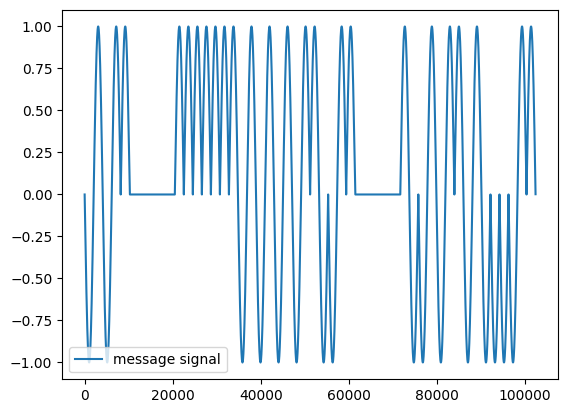

In [18]:
plt.figure()
plt.plot(m_signal, label='message signal')
plt.legend()
plt.show()

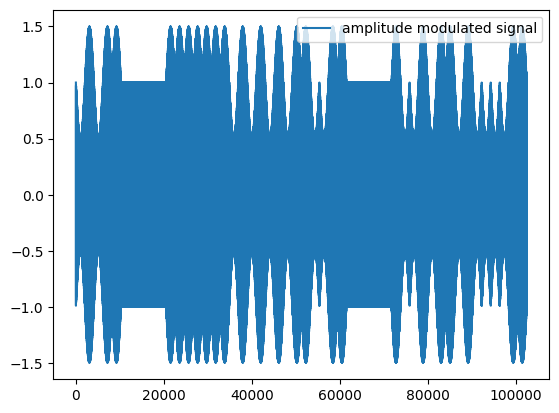

In [19]:
plt.figure()
plt.plot(am_signal, label='amplitude modulated signal')
plt.legend()
plt.show()

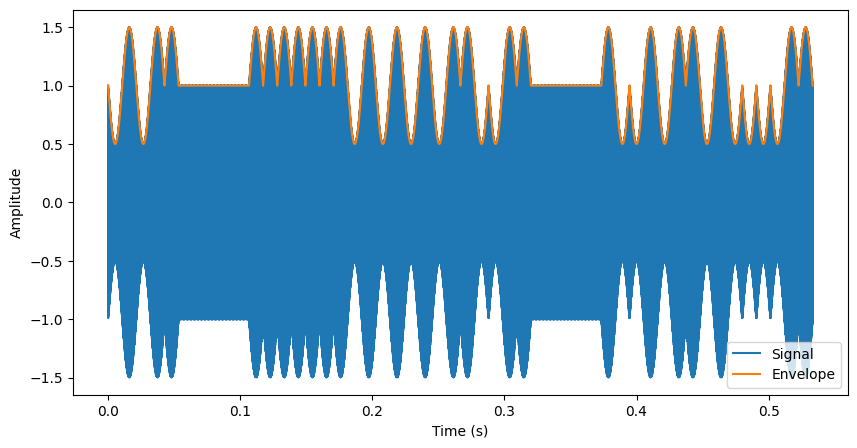

In [20]:
letters = demodulation(am_signal, 192000, plot_envelope=True)

In [21]:
message = ''.join(letters)

print(f'The message is: {message}')

The message is: i love you
